 Written by Federica B. Bianco @fedhere
 NYU CUSP PUI

 Assignment 1 Homework 4

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
 Extra Credit: FIT a gaussian to the distribution of means

In [196]:
from __future__ import print_function

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
import numpy as np
import scipy.stats as stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## choose which distributions to use 

In [197]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']

In [198]:
mymean = 100

http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [199]:
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

## 100 Normal distributions
we want distributions of different sizes (all RANDOM integers between 10 and 2000)

In [200]:
ns = 100
my_mean = 100
my_sd = 5

my_dict = {}
my_dict['normal']= {}

for i in range(ns):
    #N:
    diff_size=np.random.rand()*1990+10
    #xN distributions
    my_dict['normal'][i]=np.random.normal(my_mean, my_sd,size=diff_size)

#mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (my_dict['normal'])
len(my_dict['normal'])

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


{0: array([ 106.70869343,   95.20240554,   99.95496552,  103.42107941,
        103.23699743,   98.84319628,   91.29390147,   97.14847364,
         90.95757193,   96.90123567,   94.93349271,  101.95696529,
        109.31020997,  104.75671538,  100.60007373,   99.84709277,
        103.52643251,  106.57023628,   94.84177421,   95.81624178,
         95.83270445,  101.42036904,  101.48503799,   94.41724387,
        103.78595449,   93.83950006,  102.82859331,   93.02157467,
         96.20344011,   97.66430968,  107.83635897,   90.43672893,
         98.74620277,  101.23932514,   99.56849644,  100.71689191,
        100.086509  ,  107.37666917,  102.30623601,   93.88098282,
         98.10493684,   96.26697927,  102.06018344,   96.29621339,
         95.7651661 ,   98.88333119,  101.2149856 ,  102.3324646 ,
         99.95540062,  103.36156508,   96.17080609,  100.97663045,
         99.53818057,  117.48517421,  103.21698824,   95.63974428,
        100.85576008,   93.80343443,   94.91256715,   98.3

100

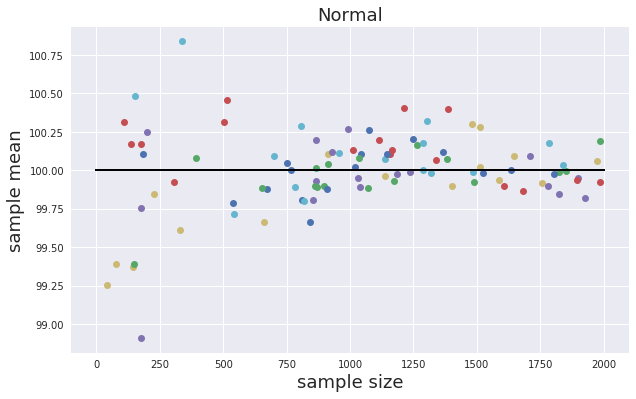

In [201]:
my_dict['normal']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in my_dict['normal']:
    if not type(nn) == str:
        sp_size = len(my_dict['normal'][nn])
        my_dict['normal']['means'][nn] = my_dict['normal'][nn].mean()
        #and plot it
        axnormal_mu_n.plot(sp_size, my_dict['normal']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
        axnormal_mu_n.set_title('Normal', fontsize=18)
        axnormal_mu_n.plot([0,2000], [my_mean, my_mean], 'k')

### Figure 1: Plot of the sample mean (dependent var.) against the sample size N (independent var.) of 100 Normal Distribution Samples

Observation: It can be observed that the central limit theory applies (as the samples from a data set with a known variance are aggregated, their mean roughly equals the population mean)

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

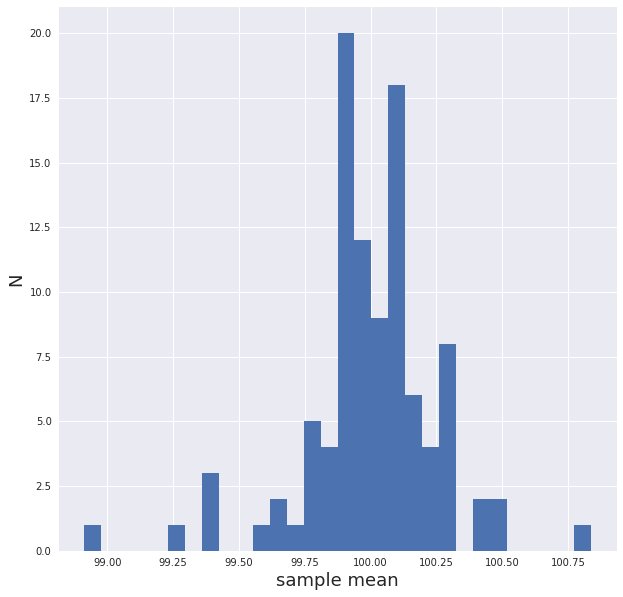

In [202]:
allmeans = list(my_dict['normal']['means'].values())
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 2: Histogram of the distribution of sample means of 100 Normally Distributed Samples

# Chi distribution


In [203]:
my_dict['Chisq']= {}

for i in range(ns):
    diff_size=np.random.rand()*1990+10
    my_dict['Chisq'][i]=np.random.chisquare(my_mean,size=diff_size)
#print (my_dict['Chisq'])
len(my_dict['Chisq'])

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


100

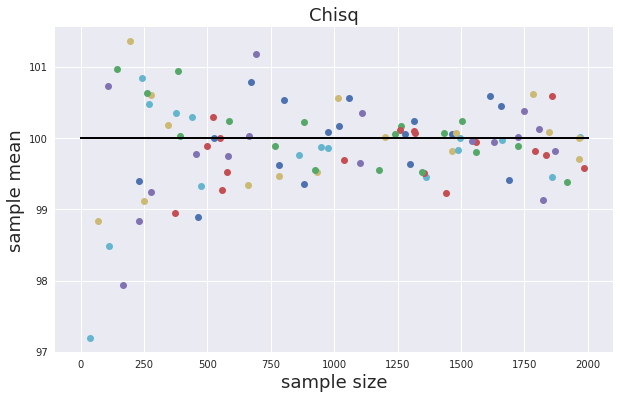

In [204]:
my_dict['Chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in my_dict['Chisq']:
    if not type(nn) == str:
        sp_size = len(my_dict['Chisq'][nn])
        my_dict['Chisq']['means'][nn] = my_dict['Chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(sp_size, my_dict['Chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chisq', fontsize=18)
        axchisq_mu_n.plot([0,2000], [my_mean, my_mean], 'k')

### Figure 3: Plot of the sample mean (dependent var.) against the sample size N (independent var.) of 100 Chi-squared Distribution Samples

Observation: It can be observed that the central limit theory applies (as the samples from a data set with a known variance are aggregated, their mean roughly equals the population mean)

# Do it for the Poisson distribution

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


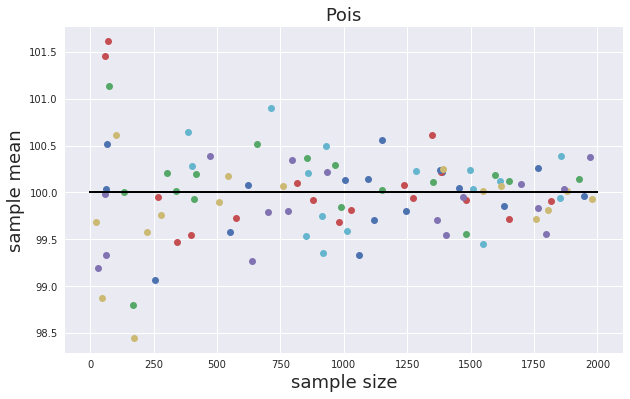

In [205]:
my_dict['Pois']= {}

for i in range(ns):
    diff_size=np.random.rand()*1990+10
    my_dict['Pois'][i]=np.random.poisson(my_mean, size=diff_size)
#print (my_dict['Chisq'])
len(my_dict['Pois'])
my_dict['Pois']['means'] = {}
axpoi_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in my_dict['Pois']:
    if not type(nn) == str:
        sp_size = len(my_dict['Pois'][nn])
        my_dict['Pois']['means'][nn] = my_dict['Pois'][nn].mean()
        #and plot it
        axpoi_mu_n.plot(sp_size, my_dict['Pois']['means'][nn], 'o')
        axpoi_mu_n.set_xlabel('sample size', fontsize=18)
        axpoi_mu_n.set_ylabel('sample mean', fontsize=18)
        axpoi_mu_n.set_title('Pois', fontsize=18)
        axpoi_mu_n.plot([0,2000], [my_mean, my_mean], 'k')

### Figure 4: Plot of the sample mean (dependent var.) against the sample size N (independent var.) of 100 Poisson Distribution Samples

Observation: It can be observed that the central limit theory applies (as the samples from a data set with a known variance are aggregated, their mean roughly equals the population mean)

# Do it for the Binomial distribution

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


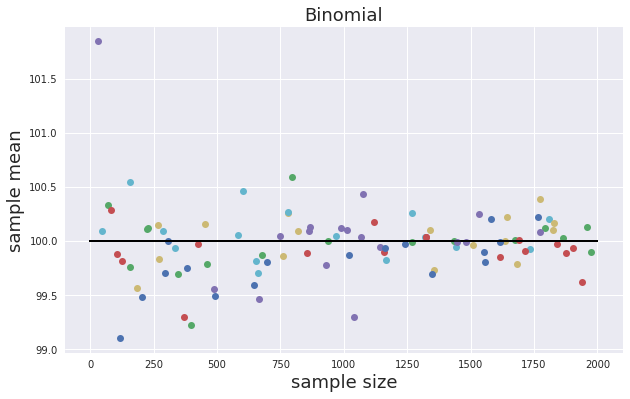

In [206]:
my_n = 200
my_p = 0.5
my_dict['Binomial']= {}

for i in range(ns):
    diff_size=np.random.rand()*1990+10
    my_dict['Binomial'][i]=np.random.binomial(my_n,my_p,size=diff_size)
#print (my_dict['Chisq'])
len(my_dict['Binomial'])
my_dict['Binomial']['means'] = {}
axbi_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in my_dict['Binomial']:
    if not type(nn) == str:
        sp_size = len(my_dict['Binomial'][nn])
        my_dict['Binomial']['means'][nn] = my_dict['Binomial'][nn].mean()
        #and plot it
        axbi_mu_n.plot(sp_size, my_dict['Binomial']['means'][nn], 'o')
        axbi_mu_n.set_xlabel('sample size', fontsize=18)
        axbi_mu_n.set_ylabel('sample mean', fontsize=18)
        axbi_mu_n.set_title('Binomial', fontsize=18)
        axbi_mu_n.plot([0,2000], [my_mean, my_mean], 'k')

### Figure 5: Plot of the sample mean (dependent var.) against the sample size N (independent var.) of 100 Binomial Distribution Samples

Observation: It can be observed that the central limit theory applies (as the samples from a data set with a known variance are aggregated, their mean roughly equals the population mean)

# Do it for another distribution

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


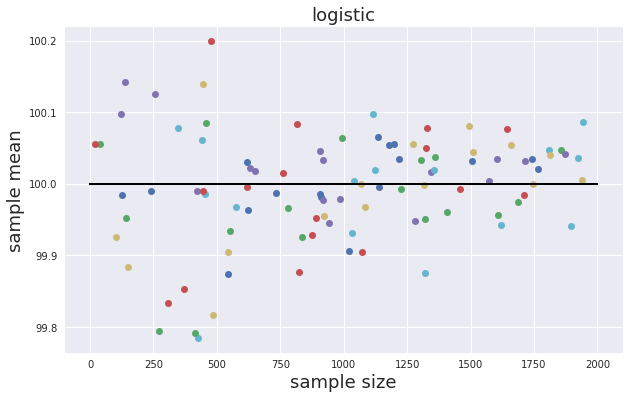

In [207]:
##your code here...
my_n = 200
my_p = 0.5
my_dict['logistic']= {}

for i in range(ns):
    diff_size=np.random.rand()*1990+10
    my_dict['logistic'][i]=np.random.logistic(my_mean, 1, size=diff_size)
#print (my_dict['Chisq'])
len(my_dict['logistic'])
my_dict['logistic']['means'] = {}
axlog_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in my_dict['logistic']:
    if not type(nn) == str:
        sp_size = len(my_dict['logistic'][nn])
        my_dict['logistic']['means'][nn] = my_dict['logistic'][nn].mean()
        #and plot it
        axlog_mu_n.plot(sp_size, my_dict['logistic']['means'][nn], 'o')
        axlog_mu_n.set_xlabel('sample size', fontsize=18)
        axlog_mu_n.set_ylabel('sample mean', fontsize=18)
        axlog_mu_n.set_title('logistic', fontsize=18)
        axlog_mu_n.plot([0,2000], [my_mean, my_mean], 'k')

### Figure 6: Plot of the sample mean (dependent var.) against the sample size N (independent var.) of 100 Logistic Distribution Samples

Observation: It can be observed that the central limit theory applies (as the samples from a data set with a known variance are aggregated, their mean roughly equals the population mean)

100

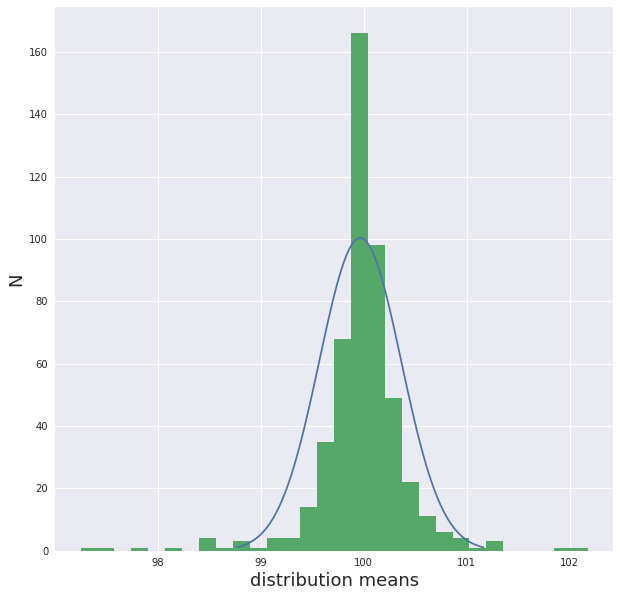

In [222]:
alldict = []
mean_mean=[]
#distribution means
for x in my_dict:
    mean_mean.extend(list(my_dict[x]['means'].values()))
mean_mean=sorted(mean_mean)
mu=np.array(mean_mean).mean()
sigma=np.array(mean_mean).std()

pl.figure(figsize=(10, 10))

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma)*100)

for d in ['normal','Pois','Binomial','logistic','Chisq']:
    alldict += my_dict[d]['means'].values() 

    alldict = np.asarray(alldict)
ax = fig.gca()
pl.hist(_xs, bins=30)
pl.xlabel('distribution means', fontsize = 18)
pl.ylabel('N', fontsize = 18)

len(alldict)

### Figure 7: Histogram of the Distribution of the Means for all the 500 Distributions (Normal, Logistic, Chi Squared, Poisson, and Binomial)